In [1]:
import os, sys
import pandas as pd
import numpy as np
from scipy import stats
from dotenv import load_dotenv
rpath = os.path.abspath('/home/user/Documents/10/w12/Semantic Image and Text Alignment')

if rpath not in sys.path:
    sys.path.insert(0, rpath)
load_dotenv()
rpath

'/home/user/Documents/10/w12/Semantic Image and Text Alignment'

In [3]:
csv_file_path = rpath + '/data/performance_data.csv'


df = pd.read_csv(csv_file_path)

In [4]:
df

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443
...,...,...,...,...
900,2443bd3b890824acecbe32659b9a1246,https://s3.eu-west-1.amazonaws.com/a.futureadl...,0.365997,0.008790
901,7ed73c1cc404f9956d26c5f58de72b2f,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103055,0.043215
902,90455f5ace15860874965eabd081b6f2,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.191425,0.038692
903,adunit-chevy-hotspot-cpe-av-mpu,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.073058,0.000057


In [128]:
def summarize_data(df):
    
   
    numeric_stats = df.describe().transpose()
    missing_values = df.isnull().sum()
    summary_df = pd.DataFrame(index=df.columns)
    summary_df['Data Type'] = df.dtypes
    summary_df['Missing Values'] = missing_values
    summary_df['Unique Values'] = df.nunique()
    summary_df = summary_df.join(numeric_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])
    # df.describe().T
    return summary_df


In [130]:
summarize_data(df)

,Data Type,Missing Values,Unique Values,mean,std,min,25%,50%,75%,max
game_id,float64,905,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preview_link,float64,905,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ER,float64,0,871,0.136318,0.091524,0.0,0.070338,0.118624,0.190722,0.524498
CTR,float64,0,851,0.034466,0.036967,0.0,0.007926,0.024537,0.047796,0.297410


In [76]:
def perform_value_counts(df):
    value_counts_dict = {}
    for column_name in df.columns:
        value_counts = df[column_name].value_counts().reset_index()
        value_counts.columns = ['Value', 'Count']
        value_counts_dict[column_name] = value_counts.set_index('Value')['Count']  # Setting 'Value' as index and 'Count' as values
    
    return pd.DataFrame(value_counts_dict)


In [78]:
perform_value_counts(df)

,game_id,preview_link,ER,CTR
Value,,,,
0.000000,NaN,NaN,34.0,55.0
0.000015,NaN,NaN,NaN,1.0
0.000047,NaN,NaN,NaN,1.0
0.000049,NaN,NaN,NaN,1.0
0.000057,NaN,NaN,NaN,1.0
...,...,...,...,...
0.429701,NaN,NaN,1.0,NaN
0.439367,NaN,NaN,1.0,NaN
0.440421,NaN,NaN,1.0,NaN


In [132]:
!pip install Pillow

In [137]:
import matplotlib.pyplot as plt
from PIL import Image

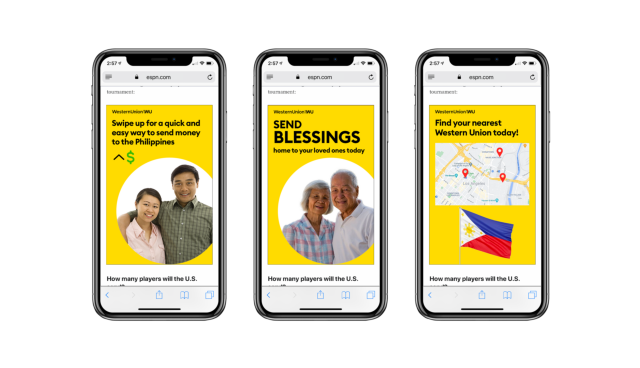

In [141]:
image_path = rpath + '/data/adludio storyboard examples/western-union-philippines_FS_600x900_storyboard.png'
image = Image.open(image_path)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [143]:
import numpy as np

# Example: Get image statistics
image_array = np.array(image)
height, width, channels = image_array.shape
data_type = image_array.dtype

print(f"Image dimensions: {width} x {height}")
print(f"Color channels: {channels}")
print(f"Data type: {data_type}")


Image dimensions: 3859 x 2171
Color channels: 4
Data type: uint8


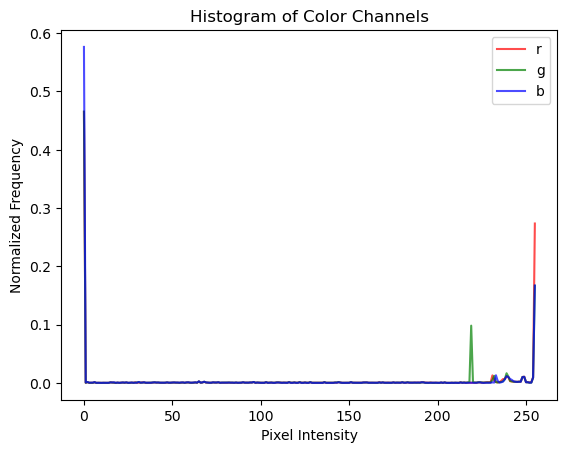

In [145]:
# Example: Plot histogram of pixel intensities
if channels == 1:
    plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')
    plt.show()
else:
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist, bins = np.histogram(image_array[:,:,i].ravel(), bins=256, range=(0, 255), density=True)
        plt.plot(hist, color=color, alpha=0.7, label=color)
    plt.title('Histogram of Color Channels')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()
